# A magical day with Machine Learning

This first notebook will have the purpose of analyzing and manipulating the raw data containing the waiting times of all attractions in disney world (orlando) and universal orlando resorts

In [1]:
import pandas as pd

uni_raw_df = pd.read_excel('Wating Times.xlsx', sheet_name='Universal') #Let's start by analyzing Universal

In [2]:
uni_raw_df.head(5)

,Date,hour,day,holiday,Pandemic,temperature,humidity,pressure,report,Dudley Do-Right's Ripsaw Falls,...,Nightingales: Blood Pit,Stranger Things,Universal Monsters,Us,Yeti: Terror of the Yukon,Woody Woodpecker's Nuthouse Co....1,E.T. Adventure.1,TRANSFORMERS: The Ride-3D.1,MEN IN BLACK Alien Attack.1,The Simpsons Ride.1
0,08/30/2020,14:20,0,0,1,26.80,79,1013,heavy intensity rain,10,...,Closed,Closed,Closed,Closed,Closed,45,30,20,40,NaN
1,08/30/2020,14:30,0,0,1,26.80,79,1013,heavy intensity rain,10,...,Closed,Closed,Closed,Closed,5,45,30,20,40,NaN
2,08/30/2020,14:40,0,0,1,26.47,74,1013,light rain,10,...,Closed,Closed,Closed,Closed,5,30,30,10,40,NaN
3,08/30/2020,14:50,0,0,1,26.87,74,1013,broken clouds,10,...,Closed,Closed,Closed,Closed,5,25,30,35,20,NaN
4,08/30/2020,15:00,0,0,1,26.88,74,1013,broken clouds,10,...,Closed,Closed,Closed,Closed,5,25,30,35,Closed,NaN


In [3]:
#pd.set_option('display.max_rows',None)
uni_raw_df.dtypes

Date                                    object
hour                                    object
day                                      int64
holiday                                  int64
Pandemic                                 int64
                                        ...   
Woody Woodpecker's Nuthouse Co....1     object
E.T. Adventure.1                        object
TRANSFORMERS: The Ride-3D.1             object
MEN IN BLACK Alien Attack.1             object
The Simpsons Ride.1                    float64
Length: 69, dtype: object

In [4]:
uni_raw_df.columns

Index(['Date', 'hour', 'day', 'holiday', 'Pandemic', 'temperature', 'humidity',
       'pressure', 'report', 'Dudley Do-Right's Ripsaw Falls',
       'Hagrid's Magical Creatures Mot...', 'Camp Jurassic',
       'Caro-Seuss-elDoctor Doom's Fearfall',
       'Dudley Do-Right's Ripsaw Falls.1', 'Flight of the Hippogriff',
       'Hagrid's Magical Creatures Mot....1',
       'Harry Potter and the Forbidden...',
       'Hogwarts Express - Hogsmeade S...', 'If I Ran The Zoo',
       'Jurassic Park Discovery Center', 'Jurassic Park River Adventure',
       'Me Ship, The Olive', 'One Fish, Two Fish, Red Fish, ...',
       'Popeye & Bluto's Bilge-Rat Barges', 'Poseidon's Fury',
       'Pteranodon Flyers', 'Skull Island: Reign of Kong',
       'Storm Force Accelatron', 'The Amazing Adventures of Spid...',
       'The Cat in The Hat', 'The High in the Sky Seuss Trol...',
       'The Incredible Hulk Coaster', 'Dudley Do-Right's Ripsaw Falls.2',
       'Hagrid's Magical Creatures Mot....2',
       

### Fixing the date variable

In [5]:
uni_raw_df['Date']

0        08/30/2020
1        08/30/2020
2        08/30/2020
3        08/30/2020
4        08/30/2020
            ...    
18714    06/25/2021
18715    06/25/2021
18716    06/25/2021
18717    06/25/2021
18718    06/25/2021
Name: Date, Length: 18719, dtype: object

First point we need to solve is this variable contains a string, so let's split the string by "/" and then treat each element as an independet integer variable

In [6]:
date = uni_raw_df['Date'].str.split(pat='/',expand=True)

In [7]:
print(date)

        0   1     2
0      08  30  2020
1      08  30  2020
2      08  30  2020
3      08  30  2020
4      08  30  2020
...    ..  ..   ...
18714  06  25  2021
18715  06  25  2021
18716  06  25  2021
18717  06  25  2021
18718  06  25  2021

[18719 rows x 3 columns]


In [8]:
date.columns=['month','day','year'] #rename the variables in the new df

In [9]:
date

,month,day,year
0,08,30,2020
1,08,30,2020
2,08,30,2020
3,08,30,2020
4,08,30,2020
...,...,...,...
18714,06,25,2021
18715,06,25,2021
18716,06,25,2021
18717,06,25,2021


In [10]:
date['month']

0        08
1        08
2        08
3        08
4        08
         ..
18714    06
18715    06
18716    06
18717    06
18718    06
Name: month, Length: 18719, dtype: object

They are still a string, let's cast them into an integer

In [11]:
date=date.astype('int')

In [12]:
date['day']

0        30
1        30
2        30
3        30
4        30
         ..
18714    25
18715    25
18716    25
18717    25
18718    25
Name: day, Length: 18719, dtype: int64

### The first variable is ready let's move into the second variable 'hour'

In [13]:
uni_raw_df['hour']

0        14:20
1        14:30
2        14:40
3        14:50
4        15:00
         ...  
18714    22:10
18715    22:20
18716    22:30
18717    22:40
18718    22:50
Name: hour, Length: 18719, dtype: object

This variable is still a string, let's split it and then cast it into an integer

In [14]:
hour=uni_raw_df['hour'].str.split(pat=':',expand=True)
hour

,0,1
0,14,20
1,14,30
2,14,40
3,14,50
4,15,00
...,...,...
18714,22,10
18715,22,20
18716,22,30
18717,22,40


In [15]:
hour.columns=['hour','minute']

In [16]:
hour.dtypes

hour      object
minute    object
dtype: object

In [17]:
hour = hour.astype('int')

In [18]:
hour.dtypes

hour      int64
minute    int64
dtype: object

### Next we need to work in the report variable, as it is a categorical variable that needs to be treated independently

In [19]:
repo=uni_raw_df['report']
repo

0        heavy intensity rain
1        heavy intensity rain
2                  light rain
3               broken clouds
4               broken clouds
                 ...         
18714               clear sky
18715               clear sky
18716               clear sky
18717               clear sky
18718               clear sky
Name: report, Length: 18719, dtype: object

In [20]:
repo.unique()

array(['heavy intensity rain', 'light rain', 'broken clouds',
       'moderate rain', 'mist', 'overcast clouds', 'clear sky',
       'scattered clouds', 'thunderstorm with rain', 'few clouds',
       'thunderstorm', 'shower rain', 'very heavy rain', 'fog', 'haze',
       'thunderstorm with light rain', 'light intensity drizzle'],
      dtype=object)

As we can see, we have several values that goes from a few clouds to very heavy rain. Here we have two different approaches, we can use one hot encoding and create a boolean variable for every value, or assign a numerical value to each option (this one can be dangerous because with this we will say that for example light rain is bigger than broken clouds)

#### Let's try first using one hot encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder

oHe = OneHotEncoder(handle_unknown='ignore')

In [22]:
oHe_report = pd.DataFrame(oHe.fit_transform(uni_raw_df[['report']]).toarray())

In [23]:
oHe_report.columns=['heavy intensity rain', 'light rain', 'broken clouds',
       'moderate rain', 'mist', 'overcast clouds', 'clear sky',
       'scattered clouds', 'thunderstorm with rain', 'few clouds',
       'thunderstorm', 'shower rain', 'very heavy rain', 'fog', 'haze',
       'thunderstorm with light rain', 'light intensity drizzle']

In [24]:
oHe_report.astype('int')

,heavy intensity rain,light rain,broken clouds,moderate rain,mist,overcast clouds,clear sky,scattered clouds,thunderstorm with rain,few clouds,thunderstorm,shower rain,very heavy rain,fog,haze,thunderstorm with light rain,light intensity drizzle
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18714,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18715,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18716,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18717,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Ordinal Encoding

Before we move on, let's try another type of encoding, called Ordinal Encoder

In [25]:
from sklearn.preprocessing import OrdinalEncoder

ord_enco = OrdinalEncoder()
oE_report = ord_enco.fit_transform(uni_raw_df[['report']])

In [26]:
oE_report_df = pd.DataFrame(oE_report).astype('int')
oE_report_df.columns=['report']

In [27]:
oE_report_df.head(5)

,report
0,5
1,5
2,7
3,0
4,0


In [28]:
uni_raw_df.report.head(5)

0    heavy intensity rain
1    heavy intensity rain
2              light rain
3           broken clouds
4           broken clouds
Name: report, dtype: object

Now what seems to be the problem with this type of encoding? Well as you can see, heavy rain is a 5 and light rain is a 0. This might confuse our algorithm. Let's do this encoding manually and choose ourselves the encoding values or our data.

### Manual Encoding

In [29]:
man_enc = pd.DataFrame(uni_raw_df['report'].replace({    'clear sky':1,
                                            'few clouds':2,
                                            'scattered clouds':3,
                                            'fog':4,
                                            'mist':5,
                                            'overcast clouds':6,
                                            'broken clouds':7,
                                            'light rain':8,
                                            'moderate rain':9,
                                            'shower rain':10,
                                            'heavy intensity rain':11,
                                            'very heavy rain':12,
                                            'light intensity drizzle':13,
                                            'haze':14,
                                            'thunderstorm':15,
                                            'thunderstorm with light rain':16,
                                            'thunderstorm with rain':17}))

In [30]:
man_enc

,report
0,11
1,11
2,8
3,7
4,7
...,...
18714,1
18715,1
18716,1
18717,1


### No missing values in the first variables

technically the API and the code for these variables do not register NaN or empty values but let's make sure this is correct

In [31]:
print(date.month.unique())
print(date.day.unique())
print(date.year.unique())
print(hour.hour.unique())
print(hour.minute.unique())
print(uni_raw_df.holiday.unique())
print(uni_raw_df.day.unique())
print(uni_raw_df.Pandemic.unique())
print(uni_raw_df.temperature.unique())
print(uni_raw_df.humidity.unique())
print(uni_raw_df.pressure.unique())


[ 8  9 10 11 12  1  2  3  4  5  6]
[30 31  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29]
[2020 2021]
[14 15 16 17 18 19  7  8  9 10 11 12 13 20 21 22 23  0  1  2  3  4  5  6]
[20 30 40 50  0 10]
[0 1]
[0 1 2 3 4 5 6]
[1]
[26.8  26.47 26.87 ... 34.05 33.11 33.22]
[ 79  74  88  83  78  70  94  62  55  52  59  66  49  44  41  89  47  56
  58  69  63  61  60  54  64  57  53  85  87  81 100  95  96  90  77  76
  75  51  48  45  65  43  73  46  35  67  71  80  82  86  38  39  34  32
  29  72  50  68  42  36  40  93  30  28  26  37  33  31  27  25  23  21
  24  20  19  91  84  92]
[1013 1015 1016 1017 1018 1019 1020 1014 1012 1011 1010 1021 1022 1023
 1024 1025 1026 1009 1008 1027 1028 1029 1030 1031 1032 1033]


As appreciated, these variables are clean and do not contain empty values ot NaN

### Data preparation for first attraction

If I were to go to orlando, the first attraction I will ride is going to be the Harry Potter ones, so i will start by cleaning and preparing the data from "Harry Potter and the Forbidden Journey"

In [32]:
uni_raw_df['Harry Potter and the Forbidden...'].unique()

array([40, 20, 15, 'Closed', 10, 30, 25, 35, 60, 5, 45, 70, 80, 75, 90,
       100, 120, 95, 110, 50, 105, 150, 55, 65, 85, 11, 115, 145, 135,
       125, 130, 180, 0, nan], dtype=object)

eventhough Universal data is cleaner than Disney's it still contain strings and Nan. to handle this, I will delete all rows that contain nan and assign to Closed a big number to try to make a corelation.

In [33]:
rideHP1=pd.DataFrame(uni_raw_df['Harry Potter and the Forbidden...'].replace({'Closed':200}))

In [34]:
rideHP1.tail(20)

,Harry Potter and the Forbidden...
18699,25.0
18700,10.0
18701,10.0
18702,NaN
18703,NaN
18704,NaN
18705,NaN
18706,NaN
18707,NaN
18708,NaN


In [35]:
rideHP1.drop(rideHP1.tail(17).index,inplace=True) 

In [36]:
rideHP1.tail(20)

,Harry Potter and the Forbidden...
18682,25.0
18683,25.0
18684,50.0
18685,50.0
18686,35.0
18687,45.0
18688,45.0
18689,60.0
18690,60.0
18691,60.0


In [37]:
rideHP1.columns=['Harry_Potter_and_the_Forbidden']

array([[<AxesSubplot:title={'center':'Harry_Potter_and_the_Forbidden'}>]],
      dtype=object)

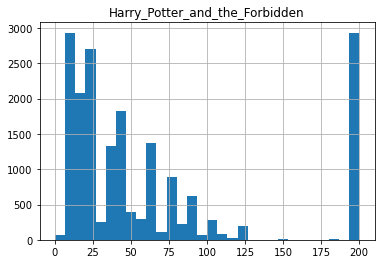

In [38]:
rideHP1.hist(bins=30)

### Concatenating all our new variables for cleansing

In [39]:
independent_vars = pd.concat([date, hour,uni_raw_df.holiday,uni_raw_df.day,uni_raw_df.Pandemic,
                            uni_raw_df.temperature,uni_raw_df.humidity, uni_raw_df.pressure,man_enc],axis=1)
independent_vars.head()

,month,day,year,hour,minute,holiday,day,Pandemic,temperature,humidity,pressure,report
0,8,30,2020,14,20,0,0,1,26.80,79,1013,11
1,8,30,2020,14,30,0,0,1,26.80,79,1013,11
2,8,30,2020,14,40,0,0,1,26.47,74,1013,8
3,8,30,2020,14,50,0,0,1,26.87,74,1013,7
4,8,30,2020,15,0,0,0,1,26.88,74,1013,7


In [40]:
independent_vars.columns

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'day', 'Pandemic',
       'temperature', 'humidity', 'pressure', 'report'],
      dtype='object')

### Normalizing the data

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(independent_vars)
independent_vars_norm = pd.DataFrame(scaler.fit_transform(independent_vars))

In [42]:
independent_vars_norm.columns=['month', 'day', 'year', 'hour', 'minute', 'holiday', 'day', 'Pandemic',
       'temperature', 'humidity', 'pressure', 'report']

In [43]:
independent_vars_norm.head()

,month,day,year,hour,minute,holiday,day,Pandemic,temperature,humidity,pressure,report
0,0.636364,0.966667,0.0,0.608696,0.4,0.0,0.0,0.0,0.721791,0.740741,0.2,0.6250
1,0.636364,0.966667,0.0,0.608696,0.6,0.0,0.0,0.0,0.721791,0.740741,0.2,0.6250
2,0.636364,0.966667,0.0,0.608696,0.8,0.0,0.0,0.0,0.711940,0.679012,0.2,0.4375
3,0.636364,0.966667,0.0,0.608696,1.0,0.0,0.0,0.0,0.723881,0.679012,0.2,0.3750
4,0.636364,0.966667,0.0,0.652174,0.0,0.0,0.0,0.0,0.724179,0.679012,0.2,0.3750


In [44]:
hp_df = pd.concat([independent_vars_norm, rideHP1],axis=1)
hp_df.head()

,month,day,year,hour,minute,holiday,day,Pandemic,temperature,humidity,pressure,report,Harry_Potter_and_the_Forbidden
0,0.636364,0.966667,0.0,0.608696,0.4,0.0,0.0,0.0,0.721791,0.740741,0.2,0.6250,40.0
1,0.636364,0.966667,0.0,0.608696,0.6,0.0,0.0,0.0,0.721791,0.740741,0.2,0.6250,40.0
2,0.636364,0.966667,0.0,0.608696,0.8,0.0,0.0,0.0,0.711940,0.679012,0.2,0.4375,40.0
3,0.636364,0.966667,0.0,0.608696,1.0,0.0,0.0,0.0,0.723881,0.679012,0.2,0.3750,40.0
4,0.636364,0.966667,0.0,0.652174,0.0,0.0,0.0,0.0,0.724179,0.679012,0.2,0.3750,20.0


<AxesSubplot:>

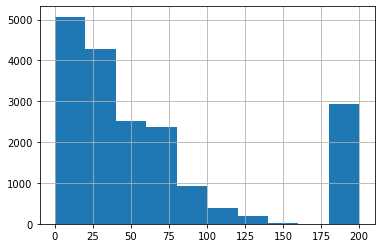

In [45]:
hp_df.Harry_Potter_and_the_Forbidden.hist()

In [46]:
hp_clean = hp_df[hp_df.Harry_Potter_and_the_Forbidden != 200]

In [47]:
hp_clean.Harry_Potter_and_the_Forbidden.unique()

array([ 40.,  20.,  15.,  10.,  30.,  25.,  35.,  60.,   5.,  45.,  70.,
        80.,  75.,  90., 100., 120.,  95., 110.,  50., 105., 150.,  55.,
        65.,  85.,  11., 115., 145., 135., 125., 130., 180.,   0.,  nan])

<AxesSubplot:>

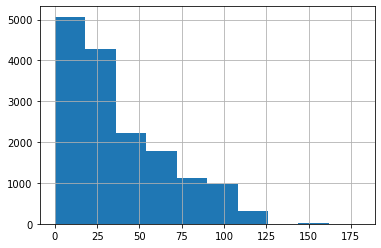

In [48]:
hp_clean.Harry_Potter_and_the_Forbidden.hist()

In [49]:
hp_clean.to_csv('harryPotterClean.csv')

### dataframes with different encodings

In [51]:
independent_vars2 = pd.concat([date, hour,uni_raw_df.holiday,uni_raw_df.day,uni_raw_df.Pandemic,
                            uni_raw_df.temperature,uni_raw_df.humidity, uni_raw_df.pressure,oHe_report],axis=1)
independent_vars3 = pd.concat([date, hour,uni_raw_df.holiday,uni_raw_df.day,uni_raw_df.Pandemic,
                            uni_raw_df.temperature,uni_raw_df.humidity, uni_raw_df.pressure,oE_report_df],axis=1)

In [55]:
scaler.fit(independent_vars2)
independent_vars_norm2 = pd.DataFrame(scaler.fit_transform(independent_vars2))
independent_vars_norm2.columns=['month', 'day', 'year', 'hour', 'minute', 'holiday', 'day', 'Pandemic',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'moderate rain', 'mist',
       'overcast clouds', 'clear sky', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'very heavy rain', 'fog', 'haze', 'thunderstorm with light rain',
       'light intensity drizzle']


scaler.fit(independent_vars3)
independent_vars_norm3 = pd.DataFrame(scaler.fit_transform(independent_vars3))
independent_vars_norm3.columns=['month', 'day', 'year', 'hour', 'minute', 'holiday', 'day', 'Pandemic',
       'temperature', 'humidity', 'pressure', 'report']

In [58]:
hp_oHe = pd.concat([independent_vars_norm2, rideHP1],axis=1)
hp_oE = pd.concat([independent_vars_norm3, rideHP1],axis=1)

In [59]:
hp_oHeClean = hp_oHe[hp_oHe.Harry_Potter_and_the_Forbidden != 200]
hp_oEClean = hp_oE[hp_oE.Harry_Potter_and_the_Forbidden != 200]

In [63]:
hp_oHeClean.to_csv('harryPotterCleanOHE.csv')
hp_oEClean.to_csv('harryPotterCleanOE.csv')